In [68]:
from glob import glob
from datasets import load_dataset
files = glob("../../data/raw/*.jsonl")
print(files)
ds_l = [load_dataset("json",data_files=i) for i in files]
ds_sm = ds_l[1]
ds_sm["test"] = ds_l[0]["train"]
ds_sm["validation"] = ds_l[2]["train"]

['../../data/raw/streaminqa_valid.jsonl', '../../data/raw/streaminqa_train.jsonl', '../../data/raw/streaminqa_eval.jsonl']


Using custom data configuration default-d244b28f1b15863e
Found cached dataset json (/root/.cache/huggingface/datasets/json/default-d244b28f1b15863e/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
100%|██████████| 1/1 [00:00<00:00, 375.09it/s]
Using custom data configuration default-f0b49b41b445f076
Found cached dataset json (/root/.cache/huggingface/datasets/json/default-f0b49b41b445f076/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
100%|██████████| 1/1 [00:00<00:00, 241.08it/s]
Using custom data configuration default-886a77e275fbf5b2
Found cached dataset json (/root/.cache/huggingface/datasets/json/default-886a77e275fbf5b2/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
100%|██████████| 1/1 [00:00<00:00, 276.74it/s]


In [69]:
# convert to pandas
df = ds_sm["validation"].to_pandas()

In [70]:
df.head().T

,0,1,2,3,4
qa_id,eval-000000,eval-000001,eval-000002,eval-000003,eval-000004
question,For what reason did the Greek navy refuse to t...,Which US State did Donald Trump and Bernie San...,Who was running in the French presidential ele...,What is the name of the Nobel Laurete who oppo...,Katy Perry reportedly got cozy with which prod...
answers,[It listed heavily during trials in the North ...,"[New Hampshire, New Hampshire , New Hampshire.]",[Nicolas Sarkozy and Alain Juppe and Marine Le...,"[Aung San Suu Kyi, Aung San Suu., Aung San Suu...","[Diplo, Diplo, diplo]"
answers_additional,[ground listed heavily during trails.],[New Hampshire.],[Alain Juppe.],[Aung San Suu Kyi],[Diplo at Coachella ]
question_ts,1581321600,1578211200,1584428400,1587020400,1586674800
evidence_ts,1268982000,1455091200,1450425600,1211871600,1398409200
evidence_id,20100319000000000000 61b9939a46fc0d51858d4545...,20160210000000000000 2fd588895c7820f7af4a938d...,20151218000000000000 047561f5d0bd0248dec23033...,20080527000000000000 0e0cd4de9b15ebf58a5476a7...,20140425000000000000 3e3d1a7024a169201f147db8...
recent_or_past,past,past,past,past,past
written_or_generated,written,written,written,written,written
toxicity_identity_attack,0.020176,0.103757,0.046074,0.117355,0.124631


In [71]:
df["evidence_ts"][0]

1268982000

In [72]:
# df["evidence_ts"].to_datetime()
import pandas as pd
df["evidence_ts"] =  pd.to_datetime(df["evidence_ts"],unit='s')

In [73]:
years = [i.year for i in df["evidence_ts"]]

In [74]:
from collections import Counter
years = Counter(years)
years

Counter({2010: 613,
         2016: 936,
         2015: 1189,
         2008: 875,
         2014: 1236,
         2020: 21681,
         2009: 1114,
         2013: 1369,
         2018: 1093,
         2017: 1343,
         2019: 2586,
         2011: 1030,
         2012: 889,
         2007: 424})

<BarContainer object of 14 artists>

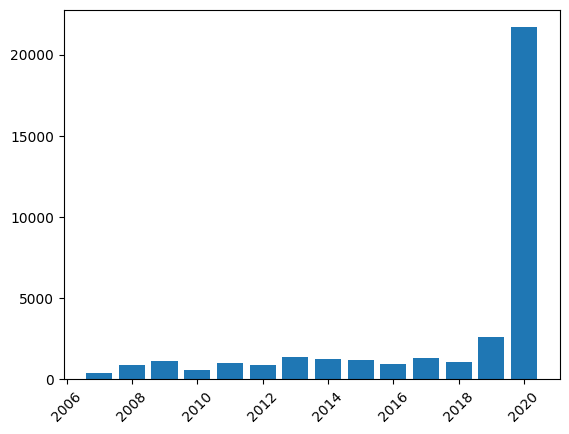

In [76]:
import collections
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.bar(years.keys(), years.values())

<BarContainer object of 13 artists>

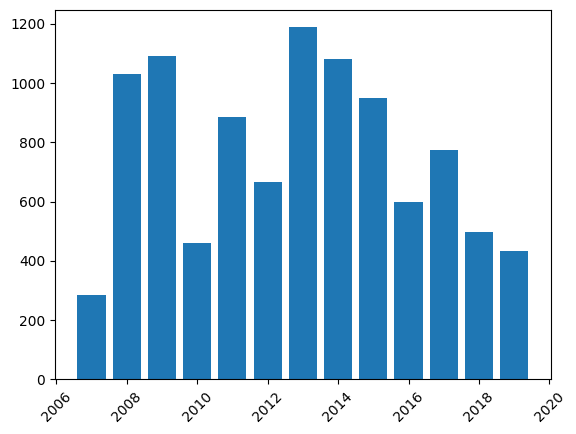

In [67]:
import collections
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.bar(years.keys(), years.values())

<BarContainer object of 13 artists>

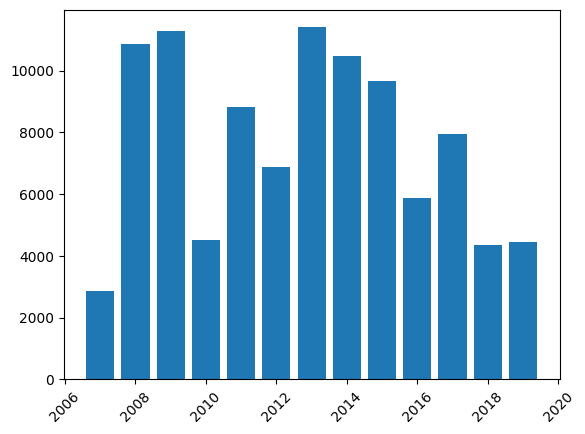

In [52]:
import collections
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.bar(years.keys(), years.values())